In [8]:
import os
import sys
import numpy as np
from sting.classifier import Classifier
from sting.data import Feature, FeatureType, parse_c45
# Add the 'src' directory to sys.path
cwd = os.getcwd()
project_root = os.path.abspath(os.path.join(cwd, '..'))  # Adjust as needed
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Import dtree function and other necessary components from dtree.py
from dtree import dtree, DecisionTree, evaluate_and_print_metrics,parse_c45

# Import util if needed
import util

# For data loading
from sting.data import parse_c45

# Set data path
data_path = os.path.join(project_root, '440data')  # Adjust as needed

# Verify the data path
print("Data path:", data_path)


Data path: /mnt/c/Users/ravir/CWRU/ML/csds440-f24-11/Programming_1/440data


Tree depth for N=50: 4
Tree depth for N=100: 7
Tree depth for N=500: 9
Tree depth for N=1000: 11
Tree depth for N=5000: 12


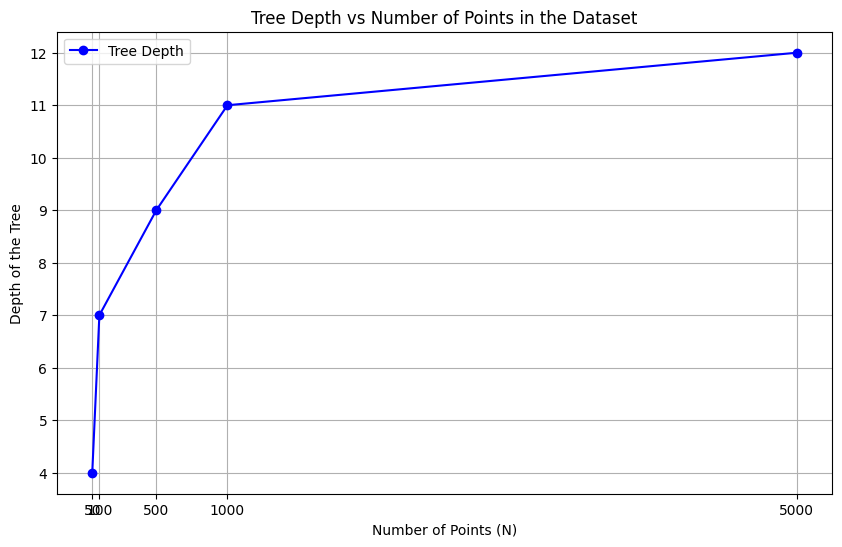

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle  # To shuffle the data (optional)

# Step 1: Generate points and label them
def generate_data(N):
    """
    Generates N points from (-1, 1)^2 and labels them using y = sign(0.5x1 + 0.5x2).
    
    Args:
        N: Number of points to generate.
        
    Returns:
        X: A numpy array of shape (N, 2) with random points from (-1, 1)^2.
        y: A numpy array of shape (N,) with labels for the points.
    """
    X = np.random.uniform(-1, 1, size=(N, 2))  # N points in (-1, 1)^2
    y = np.sign(0.5 * X[:, 0] + 0.5 * X[:, 1])  # Classifier: sign(0.5x1 + 0.5x2)
    return X, y

# Step 2: Use your ID3 implementation to learn trees
def train_id3_and_get_depth(X, y):
    """
    Trains an ID3 decision tree (using the provided ID3 implementation) and returns the depth of the tree.
    
    Args:
        X: Training data (N, 2)
        y: Labels (N,)
    
    Returns:
        depth: Depth of the learned decision tree.
    """
    # Use your existing ID3 code here
    # Replace `DecisionTreeClassifier` with your actual ID3 implementation from Programming 1
    schema = [Feature(name='x1', ftype=FeatureType.CONTINUOUS),
              Feature(name='x2', ftype=FeatureType.CONTINUOUS)]

    decision_tree = DecisionTree(schema=schema)
    decision_tree.fit(X, y)
    
    # Return the depth of the tree
    return decision_tree.get_max_depth()

# Step 3: Experiment with different values of N and plot the depth of the tree
N_values = [50, 100, 500, 1000, 5000]  # Different dataset sizes
tree_depths = []

for N in N_values:
    # Generate data
    X, y = generate_data(N)
    
    # Shuffle the data (optional, but sometimes useful)
    X, y = shuffle(X, y, random_state=42)
    
    # Train the ID3 tree and get the depth
    depth = train_id3_and_get_depth(X, y)
    
    # Store the result
    tree_depths.append(depth)
    print(f"Tree depth for N={N}: {depth}")

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, tree_depths, marker='o', color='b', label='Tree Depth')
plt.xlabel('Number of Points (N)')
plt.ylabel('Depth of the Tree')
plt.title('Tree Depth vs Number of Points in the Dataset')
plt.grid(True)
plt.xticks(N_values)
plt.legend()
plt.show()


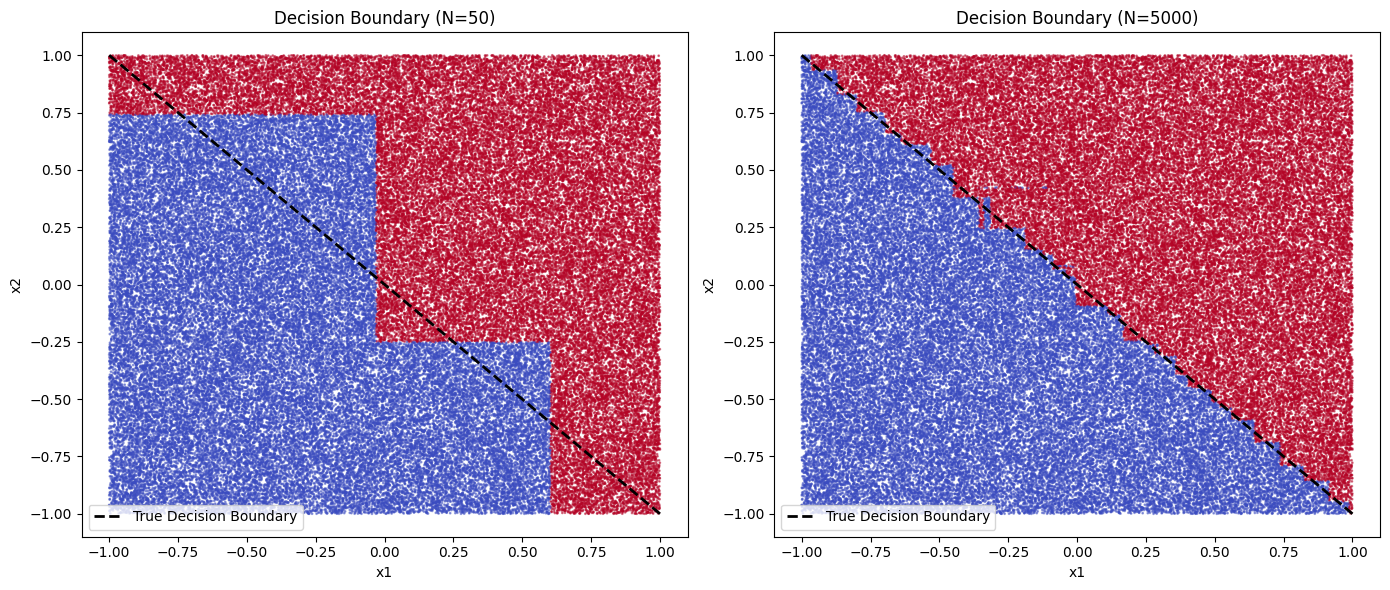

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Generate linearly separable data
def generate_data(N):
    X = np.random.uniform(-1, 1, size=(N, 2))  # N points in (-1, 1)^2
    y = np.sign(0.5 * X[:, 0] + 0.5 * X[:, 1])  # Classifier: sign(0.5x1 + 0.5x2)
    return X, y

# Generate the large independent test set
N_test = 100000  # Size of the independent test set
X_test, y_test = generate_data(N_test)

# Train decision trees for N=50 and N=5000
N_50 = 50
N_5000 = 5000
X_50, y_50 = generate_data(N_50)
X_5000, y_5000 = generate_data(N_5000)

# Train decision trees
clf_50 = DecisionTreeClassifier(criterion='entropy')
clf_50.fit(X_50, y_50)

clf_5000 = DecisionTreeClassifier(criterion='entropy')
clf_5000.fit(X_5000, y_5000)

# Predict labels for the large test set using both trees
y_pred_50 = clf_50.predict(X_test)
y_pred_5000 = clf_5000.predict(X_test)

# Create a meshgrid for plotting the true boundary
x_vals = np.linspace(-1, 1, 100)
y_vals = -x_vals  # This is the true decision boundary (x1 + x2 = 0)

# Now plot the decision boundaries for both N=50 and N=5000
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# N = 50 plot
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_50, s=1, cmap=plt.cm.coolwarm, alpha=0.5)
axs[0].plot(x_vals, y_vals, color='black', linestyle='--', linewidth=2, label="True Decision Boundary")
axs[0].set_title("Decision Boundary (N=50)")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].legend()

# N = 5000 plot
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5000, s=1, cmap=plt.cm.coolwarm, alpha=0.5)
axs[1].plot(x_vals, y_vals, color='black', linestyle='--', linewidth=2, label="True Decision Boundary")
axs[1].set_title("Decision Boundary (N=5000)")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].legend()

plt.tight_layout()
plt.show()


In [23]:
import numpy as np

# Given dataset (without weights, just using X and y)
data = [
    ['F', 'F', 'F', 'F', 0],
    ['F', 'F', 'F', 'T', 0],
    ['F', 'F', 'T', 'F', 1],
    ['F', 'F', 'T', 'T', 1],
    ['F', 'T', 'F', 'F', 1],
    ['F', 'T', 'F', 'T', 1],
    ['F', 'T', 'T', 'F', 0],
    ['F', 'T', 'T', 'T', 0],
    ['T', 'F', 'F', 'F', 1],
    ['T', 'F', 'F', 'T', 1],
    ['T', 'F', 'T', 'F', 0],
    ['T', 'F', 'T', 'T', 0],
    ['T', 'T', 'F', 'F', 0],
    ['T', 'T', 'F', 'T', 0],
    ['T', 'T', 'T', 'F', 1],
    ['T', 'T', 'T', 'T', 1]
]

# Convert data to NumPy array (features and labels)
X = np.array([row[:-1] for row in data])  # A1, A2, A3, A4 features
y = np.array([row[-1] for row in data])   # Label column

# Manually create schema
schema = [
    Feature(name="A1", ftype=FeatureType.NOMINAL, nominal_values=['T', 'F']),
    Feature(name="A2", ftype=FeatureType.NOMINAL, nominal_values=['T', 'F']),
    Feature(name="A3", ftype=FeatureType.NOMINAL, nominal_values=['T', 'F']),
    Feature(name="A4", ftype=FeatureType.NOMINAL, nominal_values=['T', 'F'])
]

# Decision tree instance to compute the first split
tree = DecisionTree(schema=schema, max_depth=1, criterion="information_gain")

# Define a function to calculate and print the information gain for all attributes
def compute_information_gain(tree, X, y, schema):
    print("Information Gain for each attribute:")
    best_feature_index, best_threshold, best_splits, best_gain = None, None, None, -np.inf
    for i, feature in enumerate(schema):
        # Calculate information gain for this feature
        current_feature_values = X[:, i]
        splits = {}
        for val in np.unique(current_feature_values):
            splits[val] = np.where(current_feature_values == val)[0]

        current_entropy = tree._determine_split_criterion(y, splits, util.entropy(y), current_feature_values)
        criterion_value, gain = current_entropy
        print(f"{feature.name}: Information Gain = {gain:.4f}")

        # Check if this is the best feature so far
        if gain > best_gain:
            best_gain = gain
            best_feature_index = i
            best_splits = splits

    return best_feature_index, best_splits, best_gain

# Calculate and print information gain for all attributes, and find the best split
best_feature_index, best_splits, best_gain = compute_information_gain(tree, X, y, schema)

# Output the best feature to split on
if best_feature_index is not None and best_gain != 0:
    print(f"\nThe best attribute to split on is: {schema[best_feature_index].name} with an Information Gain of {best_gain:.4f}")
else:
    print("No valid split found")


Information Gain for each attribute:
A1: Information Gain = 0.0000
A2: Information Gain = 0.0000
A3: Information Gain = 0.0000
A4: Information Gain = 0.0000
No valid split found


In [24]:
import numpy as np
from math import log2

# Function to calculate weighted entropy
def weighted_entropy(y, weights):
    total_weight = np.sum(weights)
    unique_labels, label_indices = np.unique(y, return_inverse=True)
    weighted_counts = np.zeros(len(unique_labels))
    
    for i, label in enumerate(unique_labels):
        weighted_counts[i] = np.sum(weights[label_indices == i])
    
    probs = weighted_counts / total_weight
    return -np.sum(probs * np.log2(probs + 1e-9))  # Small epsilon to avoid log(0)

# Function to calculate weighted information gain
def weighted_information_gain(y, y_left, y_right, w, w_left, w_right):
    total_weight = np.sum(w)
    weighted_entropy_before = weighted_entropy(y, w)
    
    # Calculate the weighted entropies for the left and right splits
    weighted_entropy_left = weighted_entropy(y_left, w_left)
    weighted_entropy_right = weighted_entropy(y_right, w_right)
    
    # Weighted average of the two entropies
    weighted_entropy_after = (np.sum(w_left) / total_weight) * weighted_entropy_left + (np.sum(w_right) / total_weight) * weighted_entropy_right
    
    # Information gain is the difference between entropies before and after the split
    return weighted_entropy_before - weighted_entropy_after

# Given dataset (X = features, y = labels, w = weights)
data = [
    ['F', 'F', 'F', 'F', 0, 1/256],
    ['F', 'F', 'F', 'T', 0, 3/256],
    ['F', 'F', 'T', 'F', 1, 3/256],
    ['F', 'F', 'T', 'T', 1, 9/256],
    ['F', 'T', 'F', 'F', 1, 3/256],
    ['F', 'T', 'F', 'T', 1, 9/256],
    ['F', 'T', 'T', 'F', 0, 9/256],
    ['F', 'T', 'T', 'T', 0, 27/256],
    ['T', 'F', 'F', 'F', 1, 3/256],
    ['T', 'F', 'F', 'T', 1, 9/256],
    ['T', 'F', 'T', 'F', 0, 9/256],
    ['T', 'F', 'T', 'T', 0, 27/256],
    ['T', 'T', 'F', 'F', 0, 9/256],
    ['T', 'T', 'F', 'T', 0, 27/256],
    ['T', 'T', 'T', 'F', 1, 27/256],
    ['T', 'T', 'T', 'T', 1, 81/256]
]

# Convert data to NumPy arrays
X = np.array([row[:-2] for row in data])  # A1, A2, A3, A4 (features)
y = np.array([row[-2] for row in data])   # Label column
weights = np.array([row[-1] for row in data])  # Weights

# Manually compute weighted information gain for each feature
for i in range(X.shape[1]):
    feature = X[:, i]
    values = np.unique(feature)
    
    # Split data based on the feature values
    left_indices = feature == values[0]
    right_indices = feature == values[1]
    
    y_left, y_right = y[left_indices], y[right_indices]
    w_left, w_right = weights[left_indices], weights[right_indices]
    
    # Calculate weighted information gain for the current feature
    gain = weighted_information_gain(y, y_left, y_right, weights, w_left, w_right)
    print(f"Weighted Information Gain for feature A{i+1}: {gain:.4f}")


Weighted Information Gain for feature A1: 0.0343
Weighted Information Gain for feature A2: 0.0343
Weighted Information Gain for feature A3: 0.0343
Weighted Information Gain for feature A4: 0.0000


In [27]:
import numpy as np
from math import log2

# Function to calculate weighted entropy
def weighted_entropy(y, weights):
    total_weight = np.sum(weights)
    unique_labels, label_indices = np.unique(y, return_inverse=True)
    weighted_counts = np.zeros(len(unique_labels))
    
    for i, label in enumerate(unique_labels):
        # Compute the weighted count for each label
        weighted_counts[i] = np.sum(weights[label_indices == i])
    
    probs = weighted_counts / total_weight  # Use weighted counts to compute probabilities
    return -np.sum(probs * np.log2(probs + 1e-9))  # Small epsilon to avoid log(0)

# Function to calculate weighted information gain
def weighted_information_gain(y, y_left, y_right, w, w_left, w_right):
    total_weight = np.sum(w)
    weighted_entropy_before = weighted_entropy(y, w)
    
    # Calculate the weighted entropies for the left and right splits
    weighted_entropy_left = weighted_entropy(y_left, w_left)
    weighted_entropy_right = weighted_entropy(y_right, w_right)
    
    # Weighted average of the two entropies
    weighted_entropy_after = (np.sum(w_left) / total_weight) * weighted_entropy_left + (np.sum(w_right) / total_weight) * weighted_entropy_right
    
    # Information gain is the difference between entropies before and after the split
    return weighted_entropy_before - weighted_entropy_after

# Dataset (X = features, y = labels, w = weights)
data = [
    ['F', 'F', 'F', 'F', 0, 1/256],
    ['F', 'F', 'F', 'T', 0, 3/256],
    ['F', 'F', 'T', 'F', 1, 3/256],
    ['F', 'F', 'T', 'T', 1, 9/256],
    ['F', 'T', 'F', 'F', 1, 3/256],
    ['F', 'T', 'F', 'T', 1, 9/256],
    ['F', 'T', 'T', 'F', 0, 9/256],
    ['F', 'T', 'T', 'T', 0, 27/256],
    ['T', 'F', 'F', 'F', 1, 3/256],
    ['T', 'F', 'F', 'T', 1, 9/256],
    ['T', 'F', 'T', 'F', 0, 9/256],
    ['T', 'F', 'T', 'T', 0, 27/256],
    ['T', 'T', 'F', 'F', 0, 9/256],
    ['T', 'T', 'F', 'T', 0, 27/256],
    ['T', 'T', 'T', 'F', 1, 27/256],
    ['T', 'T', 'T', 'T', 1, 81/256]
]

# Convert data to NumPy arrays
X = np.array([row[:-2] for row in data])  # A1, A2, A3, A4 (features)
y = np.array([row[-2] for row in data])   # Label column
weights = np.array([row[-1] for row in data])  # Weights

# Manually compute weighted information gain for each feature
for i in range(X.shape[1]):
    feature = X[:, i]
    values = np.unique(feature)
    
    # Split data based on the feature values
    left_indices = feature == values[0]
    right_indices = feature == values[1]
    
    y_left, y_right = y[left_indices], y[right_indices]
    w_left, w_right = weights[left_indices], weights[right_indices]
    
    # Calculate weighted information gain for the current feature
    gain = weighted_information_gain(y, y_left, y_right, weights, w_left, w_right)
    print(f"Weighted Information Gain for feature A{i+1}: {gain:.4f}")


Weighted Information Gain for feature A1: 0.0343
Weighted Information Gain for feature A2: 0.0343
Weighted Information Gain for feature A3: 0.0343
Weighted Information Gain for feature A4: 0.0000
